In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
df_train = pd.read_csv('./titanic/train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_test = pd.read_csv('./titanic/test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
df_submission = pd.read_csv('./titanic/gender_submission.csv')
df_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [7]:
df_submission["Survived"] = 1

In [8]:
df_submission.to_csv("submission1.csv", index = False)

## 2.1 EDA

In [9]:
df_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [10]:
len(df_train[df_train['Survived'] == 0]), len(df_train[df_train["Survived"] == 1])

(549, 342)

<AxesSubplot:xlabel='Survived', ylabel='count'>

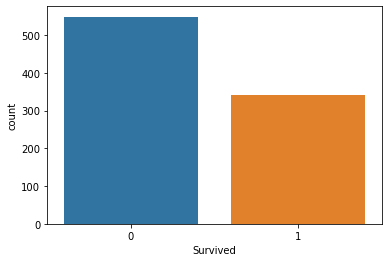

In [11]:
import seaborn as sns
sns.countplot(x = 'Survived', data = df_train)

## 2.2

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

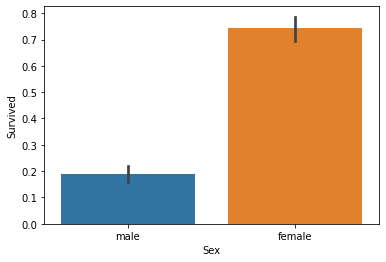

In [12]:
sns.barplot(x = 'Sex', y = 'Survived', data = df_train)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

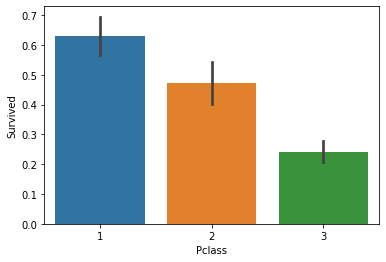

In [13]:
sns.barplot(x = 'Pclass', y = 'Survived', data = df_train)

## 2.3 features

In [14]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
for col in df_train:
    print(col)

PassengerId
Survived
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Cabin
Embarked


In [16]:
input_features = [col for col in df_train]
input_features

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [17]:
input_features = [col for col in df_train] # column 목록 출력 
output_features = ['Survived']

useless_features = ['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin']

for f in useless_features:
    input_features.remove(f)
    
X, y = df_train[input_features], df_train[output_features]

In [18]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,NaN,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [19]:
X['Sex'] = X['Sex'].astype('category').cat.codes
X['Embarked'] = X['Embarked'].astype('category').cat.codes

<ipython-input-19-51d5c9bcc539>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = X['Sex'].astype('category').cat.codes
<ipython-input-19-51d5c9bcc539>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Embarked'] = X['Embarked'].astype('category').cat.codes


In [20]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int8   
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    int8   
dtypes: float64(2), int64(3), int8(2)
memory usage: 36.7 KB


## 3-1 데이터 가공하기

In [21]:
X = X.fillna(-1) # 결측치를 -1로 채움 

In [22]:
X.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

## 4 일단 써보기

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [24]:
len(X_train), len(X_test)

(712, 179)

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train) # 모델 학습 

DecisionTreeClassifier()

In [26]:
# 정확도 출력
y_pred = tree.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.76


0.7597765363128491
              precision    recall  f1-score   support

           0       0.84      0.79      0.81       118
           1       0.63      0.70      0.67        61

    accuracy                           0.76       179
   macro avg       0.74      0.75      0.74       179
weighted avg       0.77      0.76      0.76       179

[[93 25]
 [18 43]]


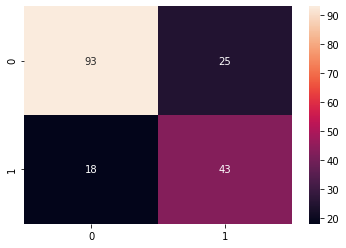

In [27]:
# y_pred = tree.predict(X_test)

# print(accuracy_score(y_test, y_pred))
# print(classification_report(y_test, y_pred))
# print(confusion_matrix(y_test, y_pred))
# sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)

def summarize_classification_result(model, X, y):
    y_pred = model.predict(X)
    
    print(accuracy_score(y, y_pred))
    print(classification_report(y, y_pred))
    print(confusion_matrix(y, y_pred))
    sns.heatmap(confusion_matrix(y, y_pred), annot = True)
    
summarize_classification_result(tree, X_test, y_test)

In [28]:
X.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

<BarContainer object of 7 artists>

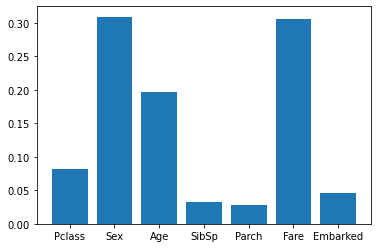

In [29]:
import matplotlib.pyplot as plt
tree.feature_importances_

feature_names = X.columns
plt.bar(x = feature_names, height = tree.feature_importances_)

In [30]:
from sklearn.tree import plot_tree

# plot_tree(tree, feature_names = feature_names)
# plt.show() # cpu가 부담스러워함.... 

## 5-1 hyperparameter

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
max_leaf_nodes = range(4, 12)
criterion = ["gini", "entropy"]

params = {"max_leaf_nodes": max_leaf_nodes, "criterion": criterion}

tree_grid = GridSearchCV(DecisionTreeClassifier(), params, cv = 5, n_jobs = -1, verbose = 1, scoring = 'accuracy')
tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_leaf_nodes': range(4, 12)},
             scoring='accuracy', verbose=1)

In [33]:
tree_grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=11)

In [34]:
tree_grid.best_params_

{'criterion': 'entropy', 'max_leaf_nodes': 11}

In [35]:
#summarize_classification_result(tree_grid.best_params_)

In [36]:
my_model = tree_grid.best_estimator_

In [38]:
df_test = pd.read_csv("./titanic/test.csv")

submission_X = df_test[input_features]
submission_X['Sex'] = submission_X["Sex"].astype('category').cat.codes
submission_X['Embarked'] = submission_X["Embarked"].astype('category').cat.codes
submission_X = submission_X.fillna(-1)
submission_y = my_model.predict(submission_X)

<ipython-input-38-cc95a52d2098>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission_X['Sex'] = submission_X["Sex"].astype('category').cat.codes
<ipython-input-38-cc95a52d2098>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission_X['Embarked'] = submission_X["Embarked"].astype('category').cat.codes


In [39]:
df_submission = pd.read_csv("./titanic/gender_submission.csv")

In [40]:
df_submission['Survived'] = submission_y

In [41]:
df_submission.to_csv('submission.csv', index = False)

In [42]:
df_submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


## 6. Ensemble

<ipython-input-43-434bc675f575>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)


0.8156424581005587
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       118
           1       0.74      0.70      0.72        61

    accuracy                           0.82       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.81      0.82      0.81       179

[[103  15]
 [ 18  43]]


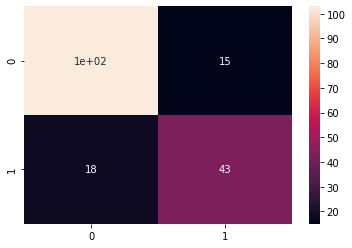

In [43]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()
forest.fit(X_train, y_train)
summarize_classification_result(forest, X_test, y_test)

## voting classifier

In [48]:
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression

In [49]:
clf1 = DecisionTreeClassifier()
clf2 = RandomForestClassifier
clf3 = XGBClassifier()
clf4 = LGBMClassifier()
clf5 = LogisticRegression()

In [50]:
hardvoting = VotingClassifier(estimators = [('tree', clf1), ('forest', clf2), ('xgb', clf3), ('lgbm', clf4), ('lr', clf5)], voting = 'hard')
softvoting = VotingClassifier(estimators = [('tree', clf1), ('forest', clf2), ('xgb', clf3), ('lgbm', clf4), ('lr', clf5)], voting = 'soft')

softvoting.fit(X_train, y_train)
softvoting

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


TypeError: Cannot clone object. You should provide an instance of scikit-learn estimator instead of a class.